# Word embedding and sentence similarities

The objective of this work, which will continue throughout this semester, is to study the impact of the representation of words in order to understand the meaning of a sentence or, more precisely, to measure the distance between two sentences.

To do this:
* you will choose a sentence in the present tense of about 15-20 words in your mother tongue. For example for me: "the doctor invites the patient for lunch".
* Then you make a past tense version of this sentence: "the doctor has invited the patient for lunch".
* Then a version that says the opposite: "the doctor did not invite the patient for lunch".
* Then a version that says something else using similar words: "the patient invites the doctor for dinner".
* and to finish a sentence that has nothing to do with it: "could you help me".

Try to assign a score between 0 and 1 between the first and subsequent sentences. 
* 1, both sentences say the same thing
* 0, the two sentences have no link
* -1, both sentences say exactly opposite things

For example, I could put the following values: [1, 0.9, -1, -0.8, 0]

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries-importation--and-function-definitions" data-toc-modified-id="Libraries-importation--and-function-definitions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries importation  and function definitions</a></span></li><li><span><a href="#Your-work" data-toc-modified-id="Your-work-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Your work</a></span></li></ul></div>

In [27]:
sentences = [
    "the doctor invites the patient for lunch",
    "the doctor has invited the patient for lunch",
    "the doctor did not invite the patient for lunch",
    "the patient invites the doctor for dinner",
    "could you help me"
]

haskell_sentences = [
    "Can we obtain the identity, constant, and fixpoint datatype constructors for arbitrary type-producing kinds?",
    "Is it possible to derive a `Lift` (or `Data`) instance for Blazes `Html`?",
    "Idiomatically return a Maybe at the end of a chain [duplicate]",
    "Explaining a Currying implementation in Haskell",
    "Error in simple haskell program with generic data type",
    "Replace regex match by arbitrary function of match itself",
    "Why random number in haskell using randomRIO giving error?",
    "What's the difference between . and (.) in Haskell?",
    "Implementing Prim's algorithm in Haskell",
    "How to write stateful dbus methods in haskell?",
    "Cabal on windows (from chocolatey) doesn't build projects with libraries",
    "Compiling a haskell script with external dependencies without cabal",
    "Haskell: Defining a variable inside a typeclass",
    "Why is this implementation a bad instance of the Foldable Typeclass?",
    "Type equality constraints and polymorphism",
    "Haskell: All combinations between multiple Strings",
    "Implementing dynamic datatype conversion in Haskell",
    "How to convert a custom type to an Integer in Haskell?",
    "Haskell evaluation synchronisation between threads",
    "Slice a list in haskell with specific indexes",
    ]

# I use only 2 sentences in the examples 
sentence_examples = [
    "bla bla 1",
    "up up 2"
]

## Libraries importation  and function definitions

In [28]:
import nltk
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity

[cosine_similarity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html) computes the L2-normalized dot product of vectors: $k(x, y) = \frac{xy^T}{\lVert x \rVert \lVert y \rVert}$

In [29]:
# Calculate similarities for a list of embeddings
def calculate_similarities(embeddings_list):
    similarities = np.zeros((len(embeddings_list[0]), len(embeddings_list)))
    for i, embeddings in enumerate(embeddings_list):
        similarities[:,i] = cosine_similarity([embeddings[0]], embeddings)
    return similarities

In [30]:
# An example
embedding1 = [[0, 1, 2],         # Represent the first embedding for 2 sentences
              [0, 4, 1]] 

embedding2 = [[1, 1, 1],         # Represent the second embedding for the same 2 sentences
             [-1, -2, -3]]

# Calculates the similarity between the first sentence and the following ones, for each embedding.
similarities = calculate_similarities([embedding1, embedding2]) 
similarities

array([[ 1.        ,  1.        ],
       [ 0.65079137, -0.9258201 ]])

In [31]:
# For plotting similarities
# from: https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

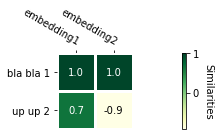

In [32]:
# An example
fig, ax = plt.subplots(figsize=(10+2*similarities.shape[1],similarities.shape[0]))

im, cbar = heatmap(similarities, sentence_examples, ["embedding1", "embedding2"], ax=ax,
                   cmap="YlGn", cbarlabel="Similarities")
texts = annotate_heatmap(im, valfmt="{x:.1f}")

fig.tight_layout()
plt.show()

In [52]:
# remove stop word (https://en.wikipedia.org/wiki/Stop_word)
stop_word_list = [".", ",", "[", "]", "`", "(", ")", "?", "'", "'s", ":"]

def remove_stop_word(txt_token, stop_word_list):
    return [w for w in txt_token if w not in stop_word_list]

In [53]:
# stem your text
def stemming(txt_token):
    # Creater a stemmer
    porter = nltk.PorterStemmer()

    return [porter.stem(w) for w in txt_token]

In [54]:
# lemmatize your text
def lemmatization(txt_token):
    # Creater a lemmatizer
    #nltk.download('wordnet')
    WNlemma = nltk.WordNetLemmatizer()

    return [WNlemma.lemmatize(w) for w in txt_token]

## Your work

Using [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html),  try the following embeddings which all use a Bag Of Word (BOW) approach:
* by words
* per bi-gram of words
* by characters
* by tri-gram of characters

The following proposals may not be possible in your native language:
* eliminate [stopwords](https://en.wikipedia.org/wiki/Stop_word)
* use stemming
* use lemming

View similarities and compare with your proposal. 

Put this work on because we are going to study other embeddings and the objective is to render at the end of the course "Introduction of Deep Learning", a notebook written comparing the different embeddings studied.

In [55]:
import nltk
# nltk.download()

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize

### Using Doctor Sentences

In [57]:
tokenized_sentences = [lemmatization(stemming(remove_stop_word(word_tokenize(sentence), 
                                                               stop_word_list)))
                       for sentence in sentences]
tokenized_sentences = list(map(" ".join, tokenized_sentences))

In [58]:
vectors = []
for analyzer in ["word", "char"]:
    for ngram in [(1,1), (2,2), (3,3)]:
        cv = CountVectorizer(binary=True, 
                             analyzer=analyzer, 
                             ngram_range=ngram, 
                             stop_words="english")
        bag = cv.fit_transform(tokenized_sentences)
        vectors.append(bag.toarray())

In [59]:
names = ["BoW ng1", "BoW ng2", "BoW ng3", "BoC ng1", "BoC ng2", "BoC ng3"]

In [60]:
similarities = calculate_similarities(vectors)

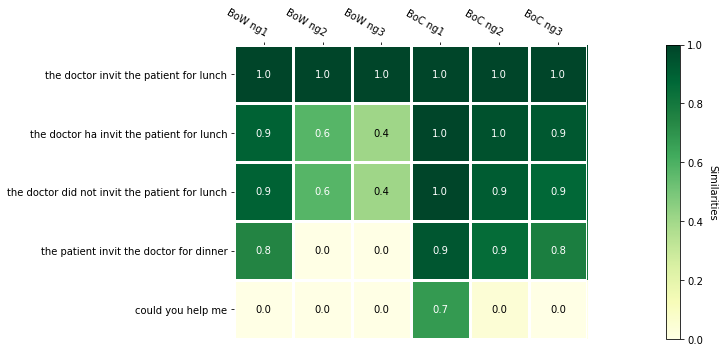

In [61]:
# An example
fig, ax = plt.subplots(figsize=(10+2*similarities.shape[1],similarities.shape[0]))

im, cbar = heatmap(similarities, tokenized_sentences, names, ax=ax,
                   cmap="YlGn", cbarlabel="Similarities")
texts = annotate_heatmap(im, valfmt="{x:.1f}")

fig.tight_layout()
plt.show()

### Using Haskell Entries from Stack Overflow

In [62]:
tokenized_sentences = [lemmatization(stemming(remove_stop_word(word_tokenize(sentence), 
                                                               stop_word_list)))
                       for sentence in haskell_sentences]
tokenized_sentences = list(map(" ".join, tokenized_sentences))

In [63]:
vectors = []
for analyzer in ["word", "char"]:
    for ngram in [(1,1), (2,2), (3,3)]:
        cv = CountVectorizer(binary=True, 
                             analyzer=analyzer, 
                             ngram_range=ngram, 
                             stop_words="english")
        bag = cv.fit_transform(tokenized_sentences)
        vectors.append(bag.toarray())

In [64]:
similarities = calculate_similarities(vectors)

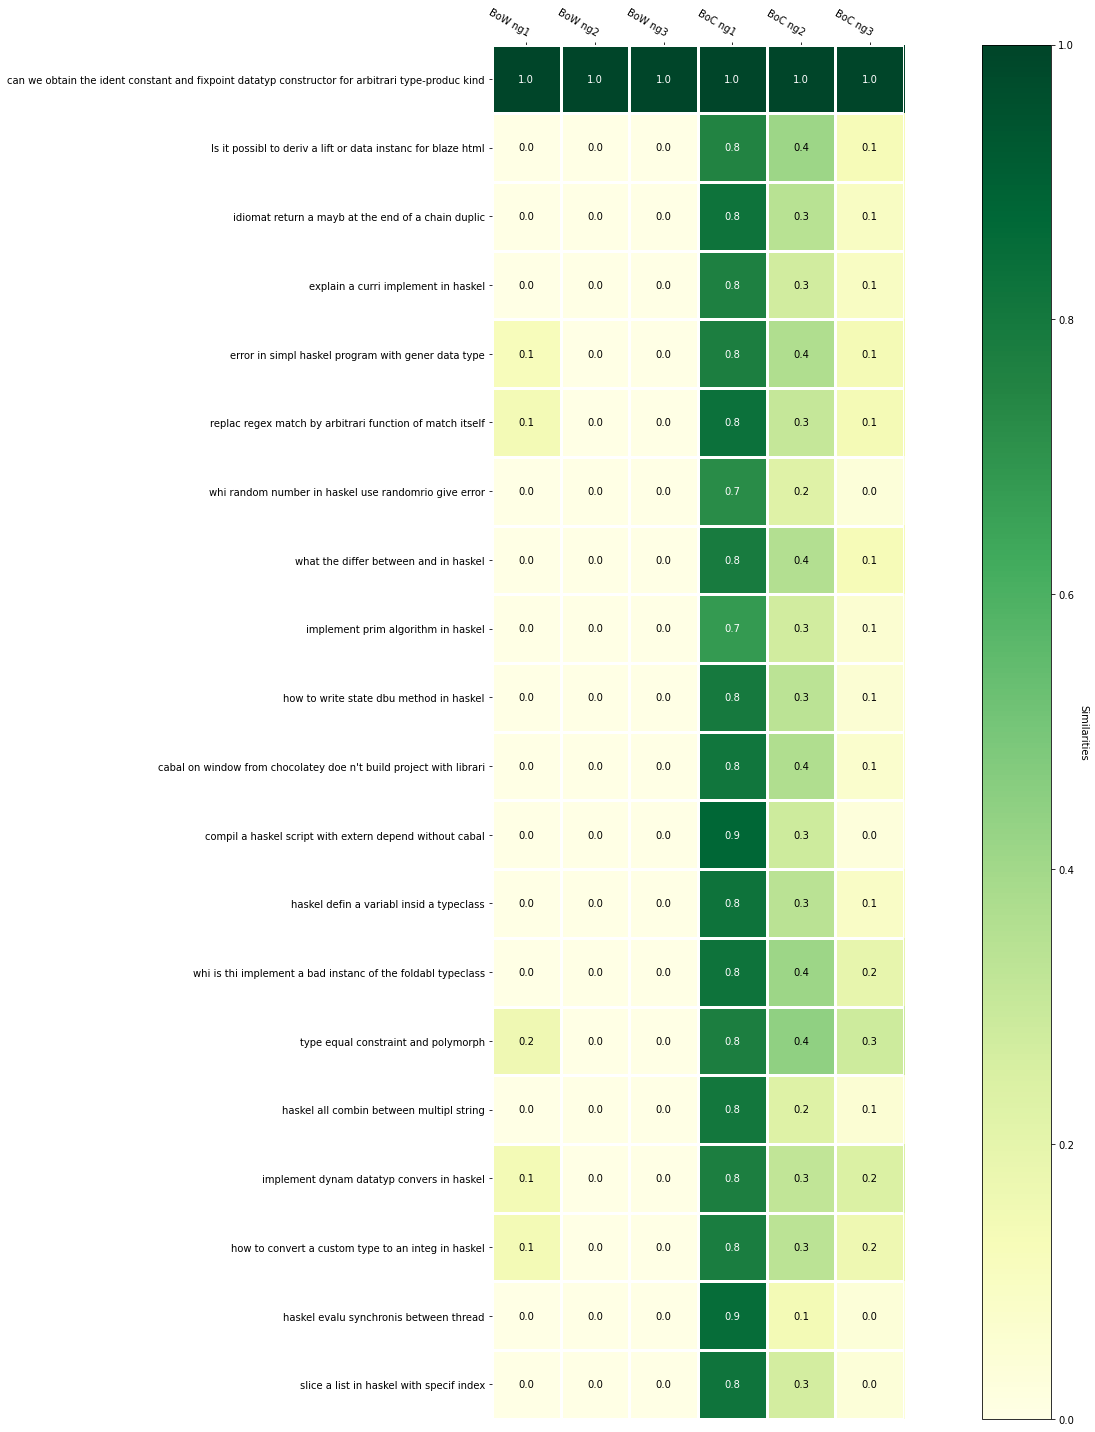

In [65]:
# An example
fig, ax = plt.subplots(figsize=(10+2*similarities.shape[1],similarities.shape[0]))

im, cbar = heatmap(similarities, tokenized_sentences, names, ax=ax,
                   cmap="YlGn", cbarlabel="Similarities")
texts = annotate_heatmap(im, valfmt="{x:.1f}")

fig.tight_layout()
plt.show()